In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [2]:
train= pd.read_csv("ZOI.csv")

In [3]:
train.head()

,NPs,Core_size,DLS_size,Zeta_potential,Shape,Class,Family,Species,Duration,Dose,ZOI,Coating
0,Ag,NaN,91.2,-34.7,spherical,Bacilli,Staphylococcaceae,S.aureus,24,333.0,34.3,Capped
1,Ag,NaN,91.2,-34.7,spherical,Bacilli,Streptococcaceae,S.mutans,24,333.0,37.1,Capped
2,Ag,NaN,91.2,-34.7,spherical,Gammaproteobacteria,Enterobacteriaceae,E.coli,24,333.0,12.4,Capped
3,Ag,NaN,91.2,-34.7,spherical,Gammaproteobacteria,Enterobacteriaceae,K.pneumoniae,24,333.0,14.1,Capped
4,Ag,22.0,72.0,-10.2,spherical,Gammaproteobacteria,Pseudomodaceae,P.aeruginosa,36,800.0,21.7,Capped


In [4]:
print(train.shape)

(831, 12)


In [5]:
train.corr()

<ipython-input-5-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Core_size,DLS_size,Zeta_potential,Duration,Dose,ZOI
Core_size,1.000000,0.344959,0.161761,-0.141325,-0.282819,0.081244
DLS_size,0.344959,1.000000,0.134358,-0.194072,0.340997,0.285500
Zeta_potential,0.161761,0.134358,1.000000,0.126324,0.005559,-0.231556
Duration,-0.141325,-0.194072,0.126324,1.000000,0.124925,-0.300635
Dose,-0.282819,0.340997,0.005559,0.124925,1.000000,0.201776
ZOI,0.081244,0.285500,-0.231556,-0.300635,0.201776,1.000000


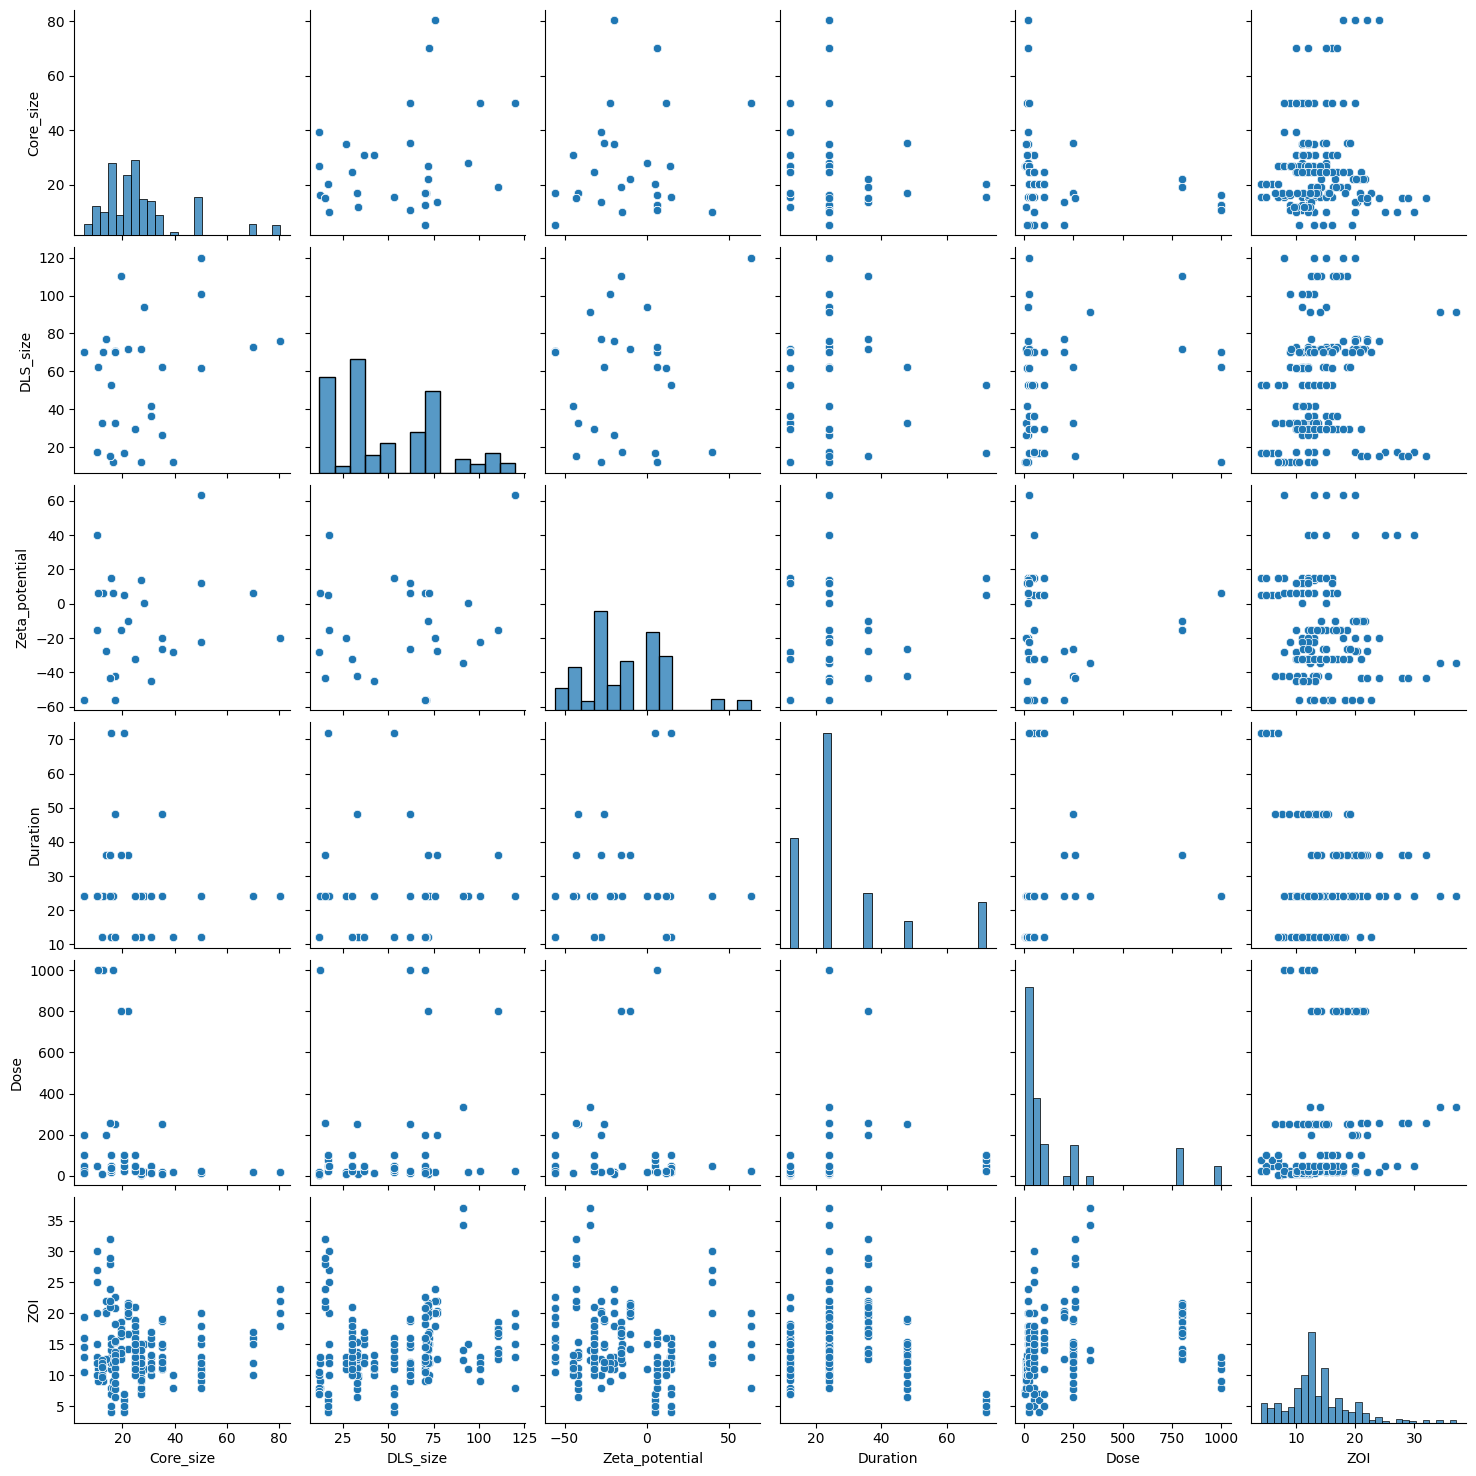

In [6]:
sns.pairplot(train)

<ipython-input-7-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

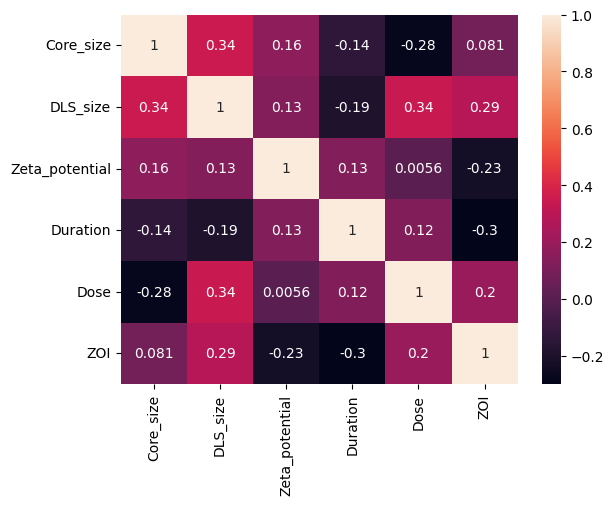

In [7]:
sns.heatmap(train.corr(),annot=True)

<ipython-input-8-df638a4a3e73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ZOI'])


<Axes: xlabel='ZOI', ylabel='Density'>

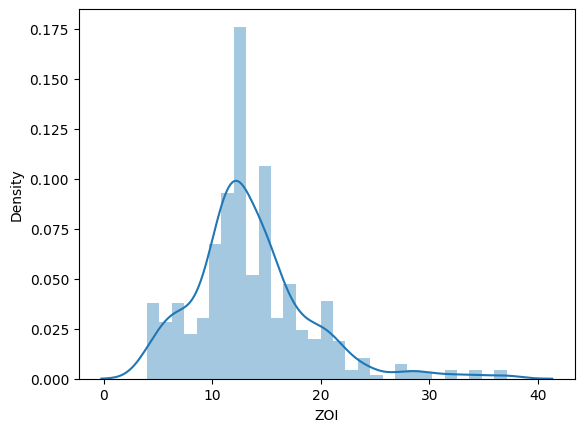

In [8]:
sns.distplot(train['ZOI'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NPs             831 non-null    object 
 1   Core_size       815 non-null    float64
 2   DLS_size        804 non-null    float64
 3   Zeta_potential  735 non-null    float64
 4   Shape           831 non-null    object 
 5   Class           831 non-null    object 
 6   Family          831 non-null    object 
 7   Species         831 non-null    object 
 8   Duration        831 non-null    int64  
 9   Dose            811 non-null    float64
 10  ZOI             831 non-null    float64
 11  Coating         831 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 78.0+ KB


In [10]:
train.count()

NPs               831
Core_size         815
DLS_size          804
Zeta_potential    735
Shape             831
Class             831
Family            831
Species           831
Duration          831
Dose              811
ZOI               831
Coating           831
dtype: int64

In [11]:
train_missing=train.isna()
train_missing.head()

,NPs,Core_size,DLS_size,Zeta_potential,Shape,Class,Family,Species,Duration,Dose,ZOI,Coating
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
train_missing.dtypes

NPs               bool
Core_size         bool
DLS_size          bool
Zeta_potential    bool
Shape             bool
Class             bool
Family            bool
Species           bool
Duration          bool
Dose              bool
ZOI               bool
Coating           bool
dtype: object

In [13]:
train_num_missing= train_missing.sum()
train_num_missing

NPs                0
Core_size         16
DLS_size          27
Zeta_potential    96
Shape              0
Class              0
Family             0
Species            0
Duration           0
Dose              20
ZOI                0
Coating            0
dtype: int64

In [14]:
train.isna().mean().round(4)*100

NPs                0.00
Core_size          1.93
DLS_size           3.25
Zeta_potential    11.55
Shape              0.00
Class              0.00
Family             0.00
Species            0.00
Duration           0.00
Dose               2.41
ZOI                0.00
Coating            0.00
dtype: float64

In [15]:
pd.get_dummies(train['NPs'])

,Ag,Au,CuO,IO,TiO2,ZnO
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
826,0,0,0,0,0,1
827,0,0,0,0,0,1
828,0,0,0,0,0,1
829,0,0,0,0,0,1


In [16]:
pd.get_dummies(train['Shape'])

,bar,cubic,polydispersed,rod,spherical,triangle
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
826,0,0,0,0,1,0
827,0,0,0,0,1,0
828,0,0,0,0,1,0
829,0,0,0,0,1,0


In [17]:
pd.get_dummies(train['Coating'],drop_first=True)

,Uncapped
0,0
1,0
2,0
3,0
4,0
...,...
826,0
827,0
828,0
829,0


In [18]:
pd.get_dummies(train['Species'])

,A.baumannii,B.cereus,B.subtilis,C.amaloticus,E.cloacae,E.coli,E.faecalis,E.faecium,E.hormaechei,K.aerogenes,...,S.dysentery,S.epidermidis,S.haemolyticus,S.marcescens,S.mutans,S.pneumoniae,S.saprophyticus,S.sonnei,S.typhi,S.typhimurium
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
pd.get_dummies(train['Class'])

,Actinomycetia,Bacilli,Gammaproteobacteria
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
826,0,0,1
827,0,0,1
828,0,0,1
829,0,0,1


In [20]:
pd.get_dummies(train['Family'])

,Bacillaceae,Enterobacteriaceae,Enterococcaceae,Listeriaceae,Micrococcaceae,Moraxellaceae,Pseudomodaceae,Staphylococcaceae,Streptococcaceae,Yersiniaceae
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
826,0,0,0,0,0,0,1,0,0,0
827,0,0,0,0,0,0,1,0,0,0
828,0,0,0,0,0,0,1,0,0,0
829,0,0,0,0,0,0,1,0,0,0


In [21]:
Nps= pd.get_dummies(train['NPs'])

In [22]:
Shp= pd.get_dummies(train['Shape'])

In [23]:
Coat= pd.get_dummies(train['Coating'])

In [24]:
Fam= pd.get_dummies(train['Family'])

In [25]:
Cls = pd.get_dummies(train['Class'])

In [26]:
Sps= pd.get_dummies(train['Species'])

In [27]:
train =pd.concat([pd.read_csv('ZOI.csv'),Nps,Coat,Shp,Fam,Cls,Sps],axis=1)

In [28]:
train.columns

Index(['NPs', 'Core_size', 'DLS_size', 'Zeta_potential', 'Shape', 'Class',
       'Family', 'Species', 'Duration', 'Dose', 'ZOI', 'Coating', 'Ag', 'Au',
       'CuO', 'IO', 'TiO2', 'ZnO', 'Capped', 'Uncapped', 'bar', 'cubic',
       'polydispersed', 'rod', 'spherical', 'triangle', 'Bacillaceae',
       'Enterobacteriaceae', 'Enterococcaceae', 'Listeriaceae',
       'Micrococcaceae', 'Moraxellaceae', 'Pseudomodaceae',
       'Staphylococcaceae', 'Streptococcaceae', 'Yersiniaceae',
       'Actinomycetia', 'Bacilli', 'Gammaproteobacteria', 'A.baumannii',
       'B.cereus', 'B.subtilis', 'C.amaloticus', 'E.cloacae', 'E.coli',
       'E.faecalis', 'E.faecium', 'E.hormaechei', 'K.aerogenes',
       'K.pneumoniae', 'L.monocytogenes', 'M.luteus', 'P.aeruginosa',
       'P.mirabilis', 'P.vulgaris', 'S.aureus', 'S.dysentery', 'S.epidermidis',
       'S.haemolyticus', 'S.marcescens', 'S.mutans', 'S.pneumoniae',
       'S.saprophyticus', 'S.sonnei', 'S.typhi', 'S.typhimurium'],
      dtype='object

In [29]:
train.drop(['NPs', 'Shape', 'Species','Class', 'Family', 'Coating'],axis=1,inplace=True)

In [30]:
train.columns

Index(['Core_size', 'DLS_size', 'Zeta_potential', 'Duration', 'Dose', 'ZOI',
       'Ag', 'Au', 'CuO', 'IO', 'TiO2', 'ZnO', 'Capped', 'Uncapped', 'bar',
       'cubic', 'polydispersed', 'rod', 'spherical', 'triangle', 'Bacillaceae',
       'Enterobacteriaceae', 'Enterococcaceae', 'Listeriaceae',
       'Micrococcaceae', 'Moraxellaceae', 'Pseudomodaceae',
       'Staphylococcaceae', 'Streptococcaceae', 'Yersiniaceae',
       'Actinomycetia', 'Bacilli', 'Gammaproteobacteria', 'A.baumannii',
       'B.cereus', 'B.subtilis', 'C.amaloticus', 'E.cloacae', 'E.coli',
       'E.faecalis', 'E.faecium', 'E.hormaechei', 'K.aerogenes',
       'K.pneumoniae', 'L.monocytogenes', 'M.luteus', 'P.aeruginosa',
       'P.mirabilis', 'P.vulgaris', 'S.aureus', 'S.dysentery', 'S.epidermidis',
       'S.haemolyticus', 'S.marcescens', 'S.mutans', 'S.pneumoniae',
       'S.saprophyticus', 'S.sonnei', 'S.typhi', 'S.typhimurium'],
      dtype='object')

<Axes: >

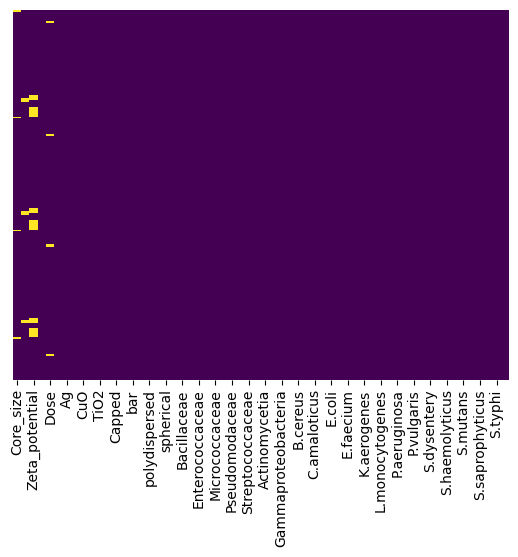

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Core_size,815.0,26.373571,15.169229,5.3,16.40,24.80,30.87,80.45
DLS_size,804.0,49.151455,29.190784,12.0,29.87,42.00,70.30,120.00
Zeta_potential,735.0,-13.577020,26.019270,-56.0,-32.00,-15.50,6.00,63.20
Duration,831.0,28.808664,17.222029,12.0,24.00,24.00,36.00,72.00
Dose,811.0,174.327990,280.980608,5.0,20.00,50.00,200.00,1000.00
ZOI,831.0,13.537208,5.375978,4.0,10.50,12.86,16.00,37.10
Ag,831.0,0.291215,0.454596,0.0,0.00,0.00,1.00,1.00
Au,831.0,0.203369,0.402747,0.0,0.00,0.00,0.00,1.00
CuO,831.0,0.184116,0.387812,0.0,0.00,0.00,0.00,1.00
IO,831.0,0.148014,0.355328,0.0,0.00,0.00,0.00,1.00


In [33]:
train['Core_size'].fillna(value= train['Core_size'].mean()).isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
826    False
827    False
828    False
829    False
830    False
Name: Core_size, Length: 831, dtype: bool

In [34]:
train['DLS_size'].fillna(value= train['DLS_size'].mean()).isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
826    False
827    False
828    False
829    False
830    False
Name: DLS_size, Length: 831, dtype: bool

<Axes: >

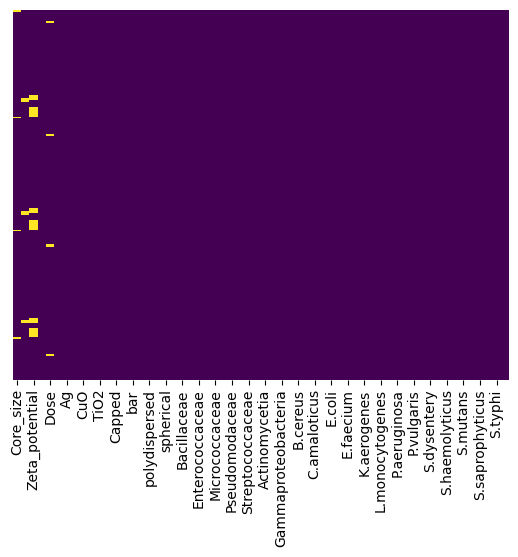

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
Dosemean=train['Dose'].mean()

In [37]:
train['Dose']=train['Dose'].fillna(Dosemean)

In [38]:
print(train['Dose'])

0      333.0
1      333.0
2      333.0
3      333.0
4      800.0
       ...  
826     50.0
827     50.0
828     50.0
829     50.0
830     50.0
Name: Dose, Length: 831, dtype: float64


In [39]:
print(train['Zeta_potential'])

0     -34.7
1     -34.7
2     -34.7
3     -34.7
4     -10.2
       ... 
826   -32.0
827   -32.0
828   -32.0
829   -32.0
830   -32.0
Name: Zeta_potential, Length: 831, dtype: float64


In [40]:
Zeta_potentialmean=train['Zeta_potential'].mean()

In [41]:
train['Zeta_potential']=train['Zeta_potential'].fillna(Zeta_potentialmean)

In [42]:
print(train['Zeta_potential'])

0     -34.7
1     -34.7
2     -34.7
3     -34.7
4     -10.2
       ... 
826   -32.0
827   -32.0
828   -32.0
829   -32.0
830   -32.0
Name: Zeta_potential, Length: 831, dtype: float64


In [43]:
DLS_sizemean=train['DLS_size'].mean()

In [44]:
train['DLS_size']=train['DLS_size'].fillna(DLS_sizemean)

In [45]:
Core_sizemean=train['Core_size'].mean()

In [46]:
train['Core_size']=train['Core_size'].fillna(Core_sizemean)

<Axes: >

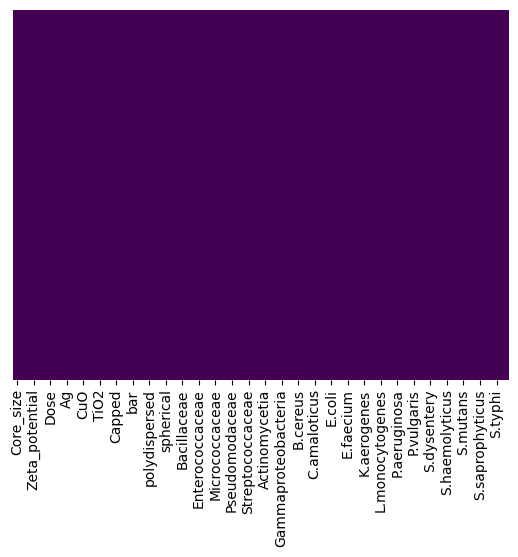

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
train.isnull().sum()

Core_size              0
DLS_size               0
Zeta_potential         0
Duration               0
Dose                   0
ZOI                    0
Ag                     0
Au                     0
CuO                    0
IO                     0
TiO2                   0
ZnO                    0
Capped                 0
Uncapped               0
bar                    0
cubic                  0
polydispersed          0
rod                    0
spherical              0
triangle               0
Bacillaceae            0
Enterobacteriaceae     0
Enterococcaceae        0
Listeriaceae           0
Micrococcaceae         0
Moraxellaceae          0
Pseudomodaceae         0
Staphylococcaceae      0
Streptococcaceae       0
Yersiniaceae           0
Actinomycetia          0
Bacilli                0
Gammaproteobacteria    0
A.baumannii            0
B.cereus               0
B.subtilis             0
C.amaloticus           0
E.cloacae              0
E.coli                 0
E.faecalis             0


In [49]:
train = train.replace(r'^\s*$', np.nan, regex=True)

In [50]:
print(train)

     Core_size  DLS_size  Zeta_potential  Duration   Dose   ZOI  Ag  Au  CuO  \
0    26.373571     91.20           -34.7        24  333.0  34.3   1   0    0   
1    26.373571     91.20           -34.7        24  333.0  37.1   1   0    0   
2    26.373571     91.20           -34.7        24  333.0  12.4   1   0    0   
3    26.373571     91.20           -34.7        24  333.0  14.1   1   0    0   
4    22.000000     72.00           -10.2        36  800.0  21.7   1   0    0   
..         ...       ...             ...       ...    ...   ...  ..  ..  ...   
826  24.800000     29.87           -32.0        24   50.0  13.0   0   0    0   
827  24.800000     29.87           -32.0        12   50.0  14.0   0   0    0   
828  24.800000     29.87           -32.0        12   50.0  15.0   0   0    0   
829  24.800000     29.87           -32.0        12   50.0  11.0   0   0    0   
830  24.800000     29.87           -32.0        12   50.0  15.0   0   0    0   

     IO  ...  S.dysentery  S.epidermidi

In [51]:
x=train.drop('ZOI',axis=1)
y=train['ZOI']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [54]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.5)
model.fit(x_train, y_train)

Lasso(alpha=0.5)

In [55]:
model.fit(x_train,y_train)

Lasso(alpha=0.5)

In [56]:
from sklearn.model_selection import KFold
kf =KFold (n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [57]:
for train, test in kf.split(train):
    print(train, test)

[ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 33

In [58]:
model.score(x_test, y_test), model.score(x_train, y_train)

(0.11850407224205439, 0.24396596439644103)

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from math import sqrt

In [60]:
y_pred = model.predict(x_test)

In [61]:
train_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
train_result

,Actual,Predicted
32,14.6,16.080830
617,7.0,7.570562
10,16.6,15.641515
160,15.0,14.207035
216,15.0,12.570216
...,...,...
540,32.0,13.208417
210,12.0,16.405327
321,12.0,13.631171
387,15.0,12.638196


In [62]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,y_pred )
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

4.97292135167381

In [63]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred)
print(errors)

3.248156408017011


In [64]:
mse= mean_squared_error(y_test,y_pred )
errors = mean_squared_error(y_test, y_pred)
print(errors)

24.729946769933278


In [65]:
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.12
